<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [2]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [5]:
len(df.Freedom)

156

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\djyff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\djyff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

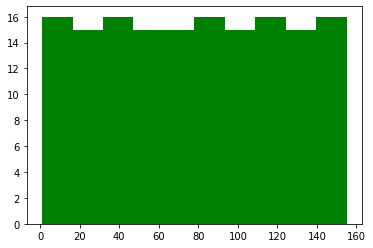

In [6]:
plt.hist(df['Freedom'], 10, facecolor='g')

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

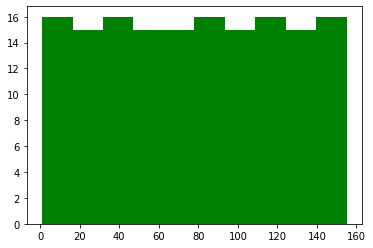

In [7]:
plt.hist(df['Positive affect'], 10, facecolor='g')

Равномерное распределение двух параметров

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
import statistics
freedom = df['Freedom']
print('Медиана: ', statistics.median(freedom))

Медиана:  71.0


In [9]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

In [10]:
len(df['Freedom'])

156

Все показатели встречаются одинаковое кол-во раз

In [11]:
freedom.mean()

78.0

In [30]:
freedom.sum()/len(freedom)

77.5

### Не совсем понятно почему результаты не одинаковы?

In [42]:
freedom.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
Name: Freedom, Length: 156, dtype: bool

In [43]:
freedom[28] = 0

C:\Users\djyff\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
statistics.pstdev(freedom)

45.032395746469746

In [45]:
statistics.pvariance(freedom)

2027.9166666666667

In [ ]:
### 

In [27]:
freedom.min()

1.0

In [46]:
freedom.max()

155.0

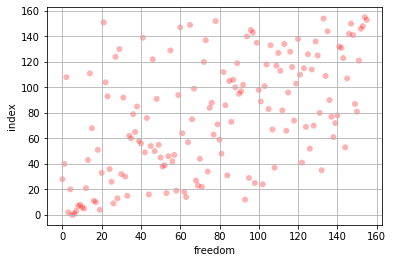

In [48]:
fig, ax = plt.subplots()
ax.scatter(freedom, df.index, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('index')
plt.show()

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

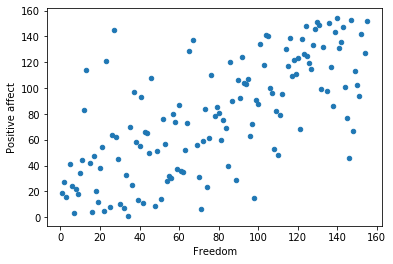

In [50]:
df.dropna().plot(x="Freedom", y="Positive affect", kind="scatter")
plt.show()

In [53]:
df_upd = df.dropna()

In [59]:
corr, p_value = sts.pearsonr(df_upd["Freedom"], df_upd["Positive affect"])
corr

0.6965670458090686

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [77]:
freedom.mean()

77.5

In [78]:
freedom_norm = freedom - freedom.mean()
print(freedom_norm.mean())

0.0


In [81]:
freedom.min(), freedom.max()

(0.0, 155.0)

In [86]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm_2 = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm_2))
print(max(freedom_norm_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

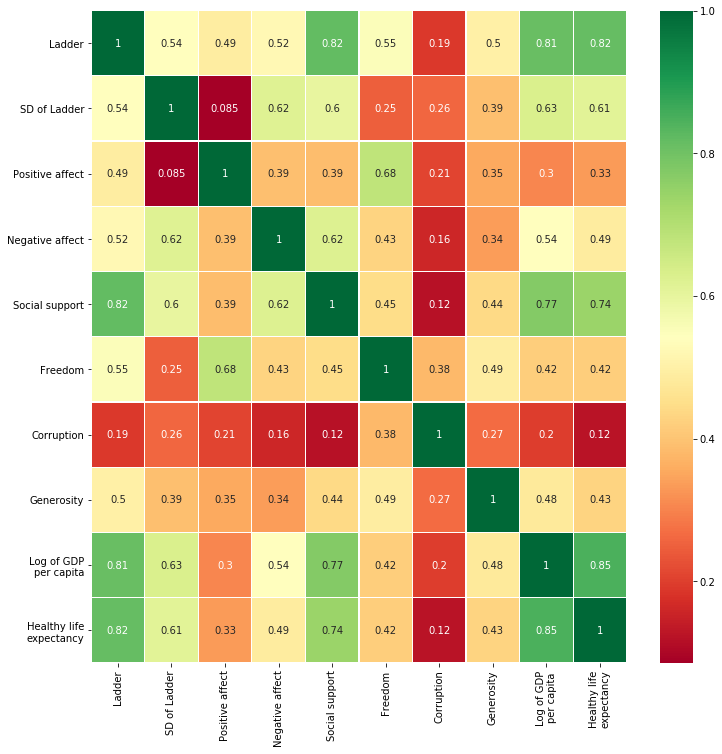

In [92]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

наивысшая корреляция ВВП с социальной поддержкой и продолжительностью жизни

Загрузить таблицу цен на авокадо: 

In [94]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_avocado=pd.read_csv(url)
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

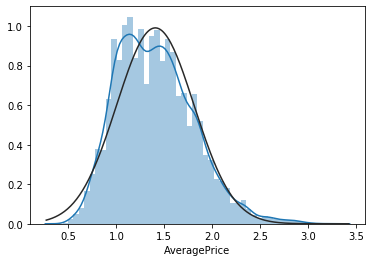

In [97]:
from scipy.stats import norm
AveragePrice = df_avocado['AveragePrice']
sns.distplot(AveragePrice, fit=norm)
plt.show()

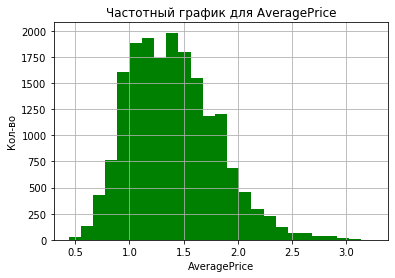

In [106]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(AveragePrice, 25, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('Кол-во')
plt.title('Частотный график для AveragePrice')
plt.grid(True)
plt.show()

Стремиться к нормальному распределению

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

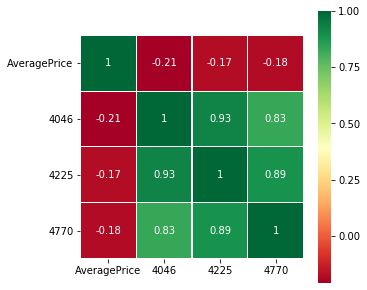

In [112]:
columns = ["AveragePrice","4046","4225","4770"]
corr = df[columns].corr()

sns.heatmap(data=corr, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Очень схожие корреляции каждого из наименований. Возможно, наименования зависят от сходного показателя

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [15]:
from fbprophet import Prophet

ImportError: cannot import name 'easter' from 'holidays' (C:\Users\djyff\Anaconda3\lib\site-packages\holidays\__init__.py)

Устанавливал и удалял через pip

Вот так еще пробовал conda install -c conda-forge fbprophet